In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from common.util import *

In [2]:
""" seed """
seeds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

""" participant """
name = "self_play"

""" policy """
name_policy = "greedy"

""" condition """
conds = ["1on1", "2on1", "2on1", "3on1", "3on1"] 

""" speed """
speed = "slow" # "slow", "equal" or "fast"

""" reward """
rewards = ["indiv", "indiv", "share", "indiv", "share"]

In [3]:
positions_e_one = []
positions_p1_one = []
positions_p2_one = []
positions_p3_one = []

positions_e_two_indiv = []
positions_p1_two_indiv = []
positions_p2_two_indiv = []
positions_p3_two_indiv = []

positions_e_two_share = []
positions_p1_two_share = []
positions_p2_two_share = []
positions_p3_two_share = []

positions_e_three_indiv = []
positions_p1_three_indiv = []
positions_p2_three_indiv = []
positions_p3_three_indiv = []

positions_e_three_share = []
positions_p1_three_share = []
positions_p2_three_share = []
positions_p3_three_share = []

for num in range(len(conds)):
    
    cond = conds[num]
    reward_p = rewards[num]
        
    """ seed """
    for seed in seeds:

        if cond == "1on1":
            rep = np.load("self_play_results/results_1on1_" + name + "_" +  speed + "_" + name_policy + "_seed_" + str(seed) + ".npz", allow_pickle=True)
        elif cond == "2on1":
            rep = np.load("self_play_results/results_2on1_" + name + "_" + reward_p + "_" +  speed + "_" + name_policy + "_seed_" + str(seed) + ".npz", allow_pickle=True)
        elif cond == "3on1":
            rep = np.load("self_play_results/results_3on1_" + name + "_" + reward_p + "_" +  speed + "_" + name_policy + "_seed_" + str(seed) + ".npz", allow_pickle=True)
        
        pos_list = np.array(rep["pos"]).squeeze()

        outcome = 100
        epis = 100
        for epi in range(epis):

            pos_e = np.array(pos_list[epi][0])
            pos_p1 = np.array(pos_list[epi][1])
            
            if num==0:
                positions_e_one.extend(np.array(pos_e))
                positions_p1_one.extend(np.array(pos_p1))
            elif num==1:
                positions_e_two_indiv.extend(np.array(pos_e))
                positions_p1_two_indiv.extend(np.array(pos_p1))
            elif num==2:
                positions_e_two_share.extend(np.array(pos_e))
                positions_p1_two_share.extend(np.array(pos_p1))
            elif num==3:
                positions_e_three_indiv.extend(np.array(pos_e))
                positions_p1_three_indiv.extend(np.array(pos_p1))
            elif num==4:
                positions_e_three_share.extend(np.array(pos_e))
                positions_p1_three_share.extend(np.array(pos_p1))

            if cond == "2on1" or cond == "3on1":
                pos_p2 = np.array(pos_list[epi][2])

                if num==1:
                    positions_p2_two_indiv.extend(np.array(pos_p2))
                elif num==2:
                    positions_p2_two_share.extend(np.array(pos_p2))
                elif num==3:
                    positions_p2_three_indiv.extend(np.array(pos_p2))
                elif num==4:   
                    positions_p2_three_share.extend(np.array(pos_p2))

            if cond == "3on1":
                pos_p3 = np.array(pos_list[epi][3])

                if num==3:
                    positions_p3_three_indiv.extend(np.array(pos_p3))
                elif num==4:
                    positions_p3_three_share.extend(np.array(pos_p3))

Correlation 1on1 indiv:
 [[1.        0.9528282]
 [0.9528282 1.       ]]
Correlation 2on1 indiv:
 [[1.         0.83373554 0.779545  ]
 [0.83373554 1.         0.92723341]
 [0.779545   0.92723341 1.        ]]
Correlation 2on1 share:
 [[1.         0.64775671 0.00628478]
 [0.64775671 1.         0.13776509]
 [0.00628478 0.13776509 1.        ]]
Correlation 3on1 indiv:
 [[1.         0.40510267 0.55556469 0.45075397]
 [0.40510267 1.         0.84592798 0.84230084]
 [0.55556469 0.84592798 1.         0.89750609]
 [0.45075397 0.84230084 0.89750609 1.        ]]
Correlation 3on1 share:
 [[1.         0.16664138 0.54105035 0.03030485]
 [0.16664138 1.         0.64197715 0.53703799]
 [0.54105035 0.64197715 1.         0.44372496]
 [0.03030485 0.53703799 0.44372496 1.        ]]


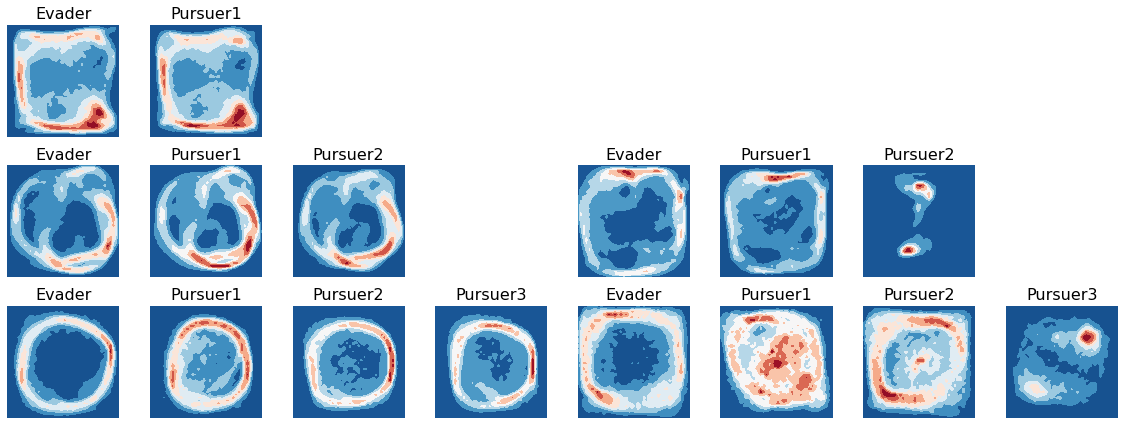

In [4]:
def create_heatmap(ax, data, title, bin_num=40, cmap='RdBu_r'):
    H, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-1, 1], [-1, 1]], bins=bin_num)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    ax.set_aspect('equal')
    ax.set_title(title, fontsize=16)
    ax.contourf(H.T, extent=extent, cmap=cmap)
    return H.reshape(-1)

fig, axes = plt.subplots(3, 8, figsize=(16, 6))
for row in range(3):
    for col in range(8):
        axes[row, col].axis('off')

for num in range(len(conds)):
    cond = conds[num]
    reward_p = rewards[num]
    
    heatmap_e = []
    heatmap_p1 = []
    heatmap_p2 = []
    heatmap_p3 = []

    if cond == '1on1':
        heatmap_e = positions_e_one
        heatmap_p1 = positions_p1_one
    elif cond == '2on1' and reward_p == 'indiv':
        heatmap_e = positions_e_two_indiv
        heatmap_p1 = positions_p1_two_indiv
        heatmap_p2 = positions_p2_two_indiv
    elif cond == '2on1' and reward_p == 'share':
        heatmap_e = positions_e_two_share
        heatmap_p1 = positions_p1_two_share
        heatmap_p2 = positions_p2_two_share
    elif cond == '3on1' and reward_p == 'indiv':
        heatmap_e = positions_e_three_indiv
        heatmap_p1 = positions_p1_three_indiv
        heatmap_p2 = positions_p2_three_indiv
        heatmap_p3 = positions_p3_three_indiv
    elif cond == '3on1' and reward_p == 'share':
        heatmap_e = positions_e_three_share
        heatmap_p1 = positions_p1_three_share
        heatmap_p2 = positions_p2_three_share
        heatmap_p3 = positions_p3_three_share
    
    heatmap_e = np.array(heatmap_e) if heatmap_e else None
    heatmap_p1 = np.array(heatmap_p1) if heatmap_p1 else None
    heatmap_p2 = np.array(heatmap_p2) if heatmap_p2 else None
    heatmap_p3 = np.array(heatmap_p3) if heatmap_p3 else None
    
    row_idx = {'1on1': 0, '2on1': 1, '3on1': 2}[cond]
    col_idx = 0 if reward_p == 'indiv' or cond == '1on1' else 4

    zs = []

    if heatmap_e is not None:
        z0 = create_heatmap(axes[row_idx, col_idx], heatmap_e, "Evader")
        zs.append(z0)
        
    if heatmap_p1 is not None:
        z1 = create_heatmap(axes[row_idx, col_idx + 1], heatmap_p1, "Pursuer1")
        zs.append(z1)

    if heatmap_p2 is not None:
        z2 = create_heatmap(axes[row_idx, col_idx + 2], heatmap_p2, "Pursuer2")
        zs.append(z2)
        
    if heatmap_p3 is not None:
        z3 = create_heatmap(axes[row_idx, col_idx + 3], heatmap_p3, "Pursuer3")
        zs.append(z3)

    r = np.corrcoef(zs) 
    print(f"Correlation {cond} {reward_p}:\n", r)

plt.tight_layout()
plt.show()